In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("deliveries.csv")
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102266,733995,2,Chennai Super Kings,Mumbai Indians,2,6,BB McCullum,P Kumar,DR Smith,1,0,1,NaN,0,NaN,NaN,NaN
102267,733995,2,Chennai Super Kings,Mumbai Indians,3,1,BB McCullum,JJ Bumrah,DR Smith,0,1,1,legbyes,0,NaN,NaN,NaN
102268,733995,2,Chennai Super Kings,Mumbai Indians,3,2,DR Smith,JJ Bumrah,BB McCullum,0,0,0,NaN,0,NaN,NaN,NaN
102269,733995,2,Chennai Super Kings,Mumbai Indians,3,3,DR Smith,JJ Bumrah,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
columns_to_drop = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder']
df = df.drop(columns=columns_to_drop, axis=1)
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'is_wicket'],
      dtype='object')

In [ ]:
df2 = pd.read_csv("matches.csv")
df2

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:

columns_to_drop = ['method']
df2 = df2.drop(columns=columns_to_drop, axis=1)

In [ ]:
df2.city.unique()


array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Bengaluru', 'Dubai',
       'Sharjah', 'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'],
      dtype=object)

In [ ]:
df2['city'] = df2['city'].replace('Bangalore', 'Bengaluru')

In [ ]:
df2.city.unique()

array(['Bengaluru', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Rajkot', 'Kanpur', 'Dubai', 'Sharjah',
       'Navi Mumbai', 'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [ ]:

df2.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Brabourne Stadium, Mumbai',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sh

In [ ]:
venue = {
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium',
    'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association Stadium, Mohali',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association Stadium, Mohali',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'MA Chidambaram Stadium',
    'Wankhede Stadium, Mumbai': 'Wankhede Stadium',
    'Eden Gardens, Kolkata': 'Eden Gardens',
    'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Rajiv Gandhi International Stadium',
    'Dr DY Patil Sports Academy, Mumbai': 'Dr DY Patil Sports Academy',
    'Maharashtra Cricket Association Stadium, Pune': 'Maharashtra Cricket Association Stadium',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Himachal Pradesh Cricket Association Stadium',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
    'Barsapara Cricket Stadium, Guwahati': 'Barsapara Cricket Stadium',
    'Narendra Modi Stadium, Ahmedabad': 'Narendra Modi Stadium',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Ekana Cricket Stadium',
    'Sawai Mansingh Stadium, Jaipur': 'Sawai Mansingh Stadium',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Vidarbha Cricket Association Stadium',
    'Brabourne Stadium, Mumbai': 'Brabourne Stadium',
}

df2['venue'] = df2['venue'].replace(venue)

In [ ]:
df2.venue.unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium', 'MA Chidambaram Stadium',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Maharashtra Cricket Association Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Duba

In [ ]:
df2['city'] = df2['city'].fillna(df2['venue'].map(df2.groupby('venue')['city'].first()))


In [ ]:
df2.isnull().sum()


,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
df2['player_of_match'].fillna('Unknown', inplace=True)
df2['winner'].fillna('No Winner', inplace=True)
df2['result_margin'].fillna(0, inplace=True)
df2['target_runs'].fillna(0, inplace=True)
df2['target_overs'].fillna(0, inplace=True)

In [ ]:
df2.isnull().sum()

,0
id,0
season,0
city,0
date,0
match_type,0
player_of_match,0
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
df2.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
df2.team2.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [ ]:
team_name_mapping = {
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'
}

df2.replace({'team1': team_name_mapping, 'team2': team_name_mapping, 'toss_winner': team_name_mapping, 'winner': team_name_mapping}, inplace=True)

In [ ]:
df2.columns


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

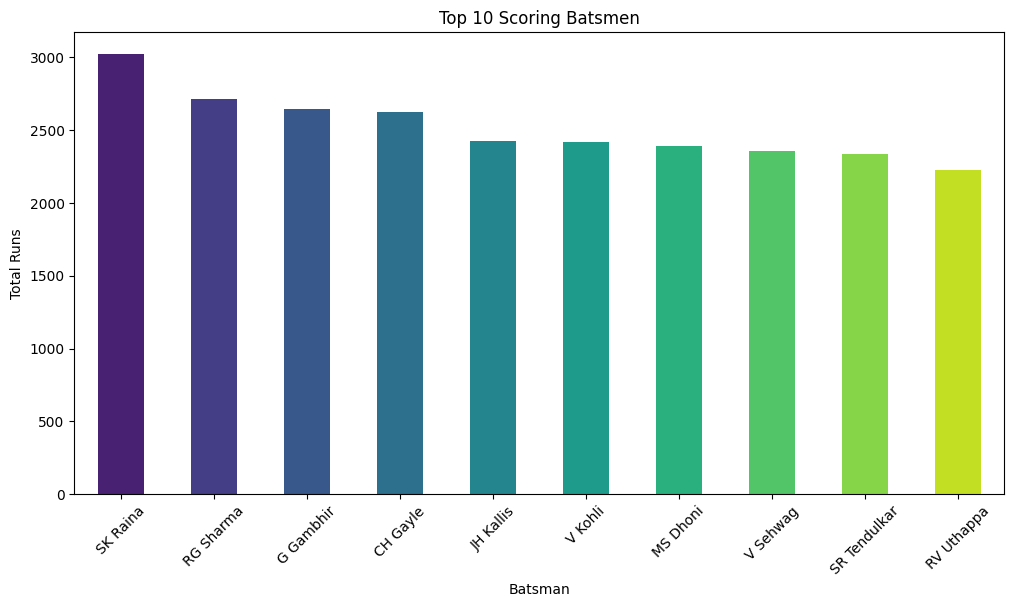

In [ ]:
#Top 10 scoring batsman in the tournament
top_batsmen = (
    df.groupby("batter")["batsman_runs"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

colors = sns.color_palette("viridis", len(top_batsmen))

plt.figure(figsize=(12, 6))
top_batsmen.plot(kind="bar", color=colors)
plt.title("Top 10 Scoring Batsmen")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Top 10 highest scores by batsman
top_scorers = (
    df.groupby(["match_id", "batter"])["batsman_runs"]
    .sum()
    .reset_index()
    .sort_values(by="batsman_runs", ascending=False)
    .head(10)
)
top_scorers

,match_id,batter,batsman_runs
5302,598027,CH Gayle,175
2,335982,BB McCullum,158
4687,548372,CH Gayle,128
2237,419137,M Vijay,127
2788,501206,PC Valthaty,120
3325,501243,V Sehwag,119
119,335990,A Symonds,117
21,335983,MEK Hussey,116
569,336019,SE Marsh,115
1701,392236,MK Pandey,114


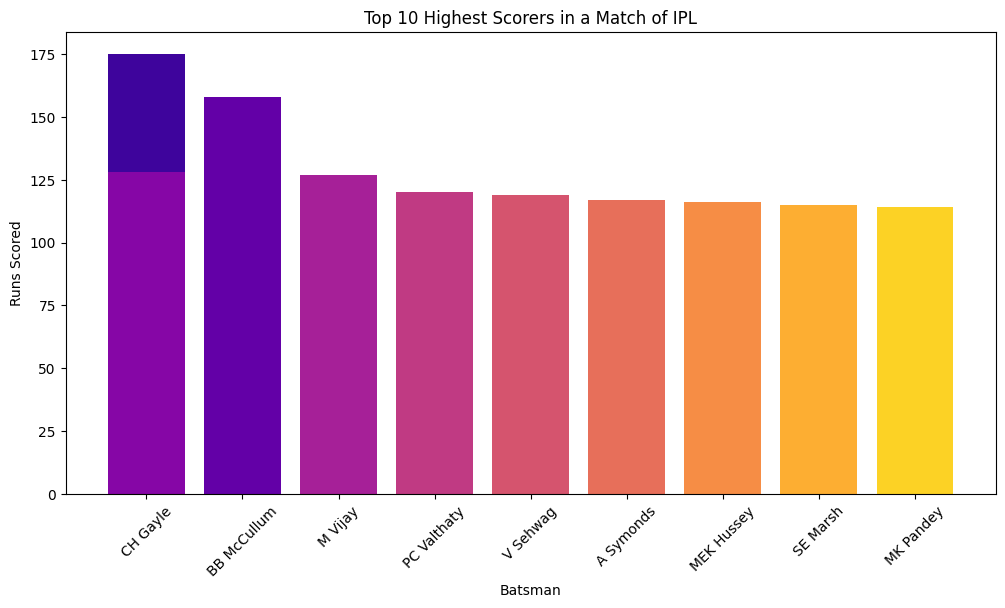

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("plasma", len(top_scorers))
plt.bar(top_scorers["batter"], top_scorers["batsman_runs"], color=colors)
plt.title("Top 10 Highest Scorers in a Match of IPL")
plt.xlabel("Batsman")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Top 10 wicket takers
top_bowlers = (
    df[df["is_wicket"] == 1]
    .groupby("bowler")["is_wicket"]
    .count()
    .sort_values(ascending=False)
    .head(10)
)
top_bowlers

,is_wicket
bowler,
SL Malinga,127
R Vinay Kumar,108
A Mishra,107
RP Singh,97
IK Pathan,96
DW Steyn,95
PP Ojha,95
PP Chawla,94
Harbhajan Singh,92


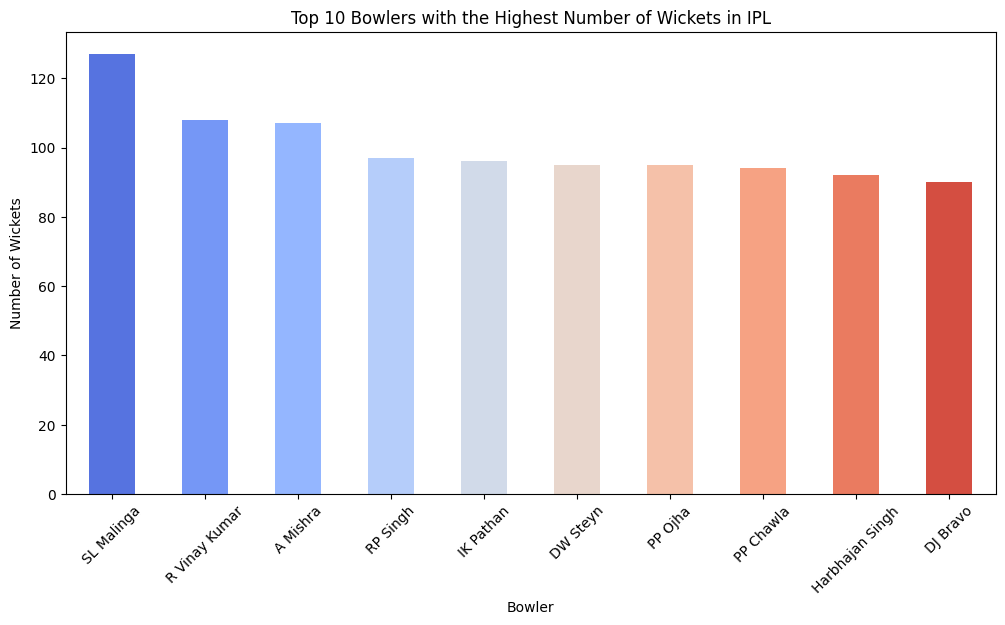

In [ ]:
plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(top_bowlers))
top_bowlers.plot(kind="bar", color=colors)
plt.title("Top 10 Bowlers with the Highest Number of Wickets in IPL")
plt.xlabel("Bowler")
plt.ylabel("Number of Wickets")
plt.xticks(rotation=45)
plt.show()

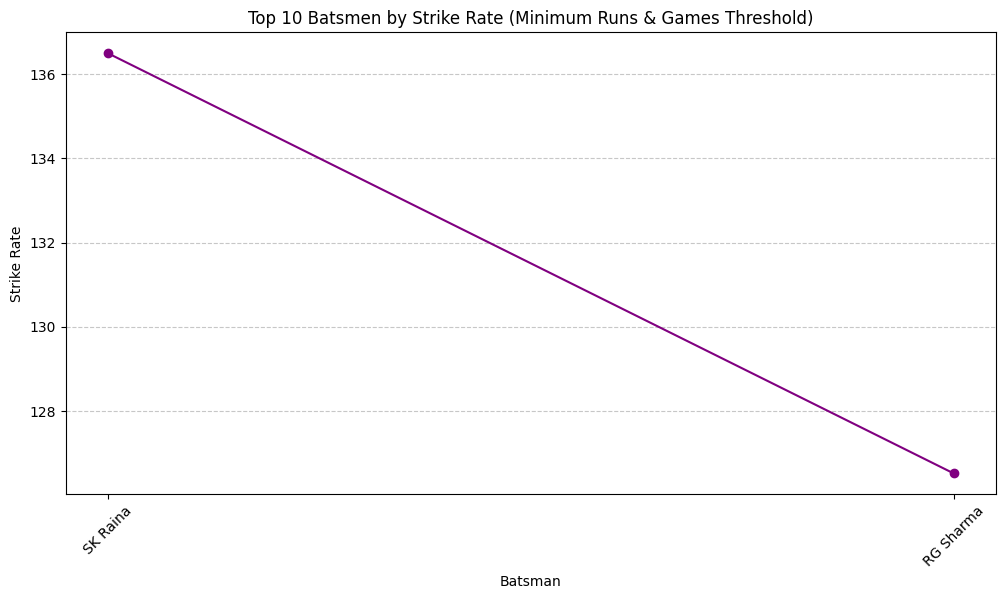

In [ ]:
#Top 10 batsman strike rate analysis

games_played = df.groupby("batter")["match_id"].nunique().reset_index()
games_played.columns = ["batter", "games_played"]

strike_rate_df = (
    df.groupby("batter")
    .agg({"batsman_runs": "sum", "ball": "count"})
    .reset_index()
)
strike_rate_df = strike_rate_df.merge(games_played, on="batter")
strike_rate_df = strike_rate_df[
    (strike_rate_df["batsman_runs"] >= 100) & (strike_rate_df["games_played"] >= 100)
]
strike_rate_df["strike_rate"] = (strike_rate_df["batsman_runs"] / strike_rate_df["ball"]) * 100
strike_rate_df_sorted = strike_rate_df.sort_values(by="strike_rate", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.plot(
    strike_rate_df_sorted["batter"],
    strike_rate_df_sorted["strike_rate"],
    marker="o",
    linestyle="-",
    color="purple",
)
plt.title("Top 10 Batsmen by Strike Rate (Minimum Runs & Games Threshold)")
plt.xlabel("Batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

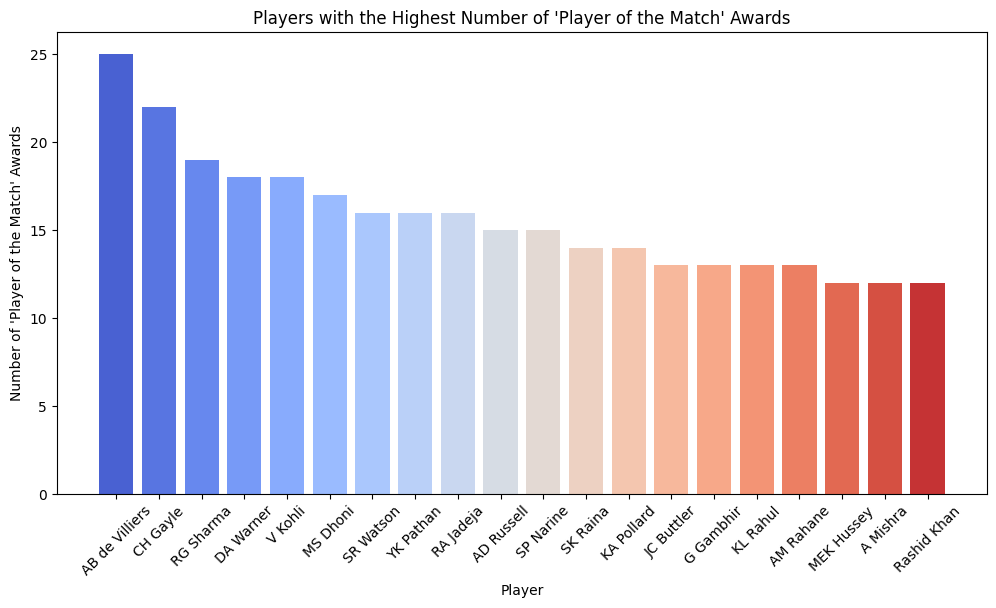

In [ ]:
#Players with most number of Man of the Match awards
top_players_mom = df2["player_of_match"].value_counts().head(20)

plt.figure(figsize=(12, 6))
colors = sns.color_palette("coolwarm", len(top_players_mom))
plt.bar(top_players_mom.index, top_players_mom.values, color=colors)
plt.title("Players with the Highest Number of 'Player of the Match' Awards")
plt.xlabel("Player")
plt.ylabel("Number of 'Player of the Match' Awards")
plt.xticks(rotation=45)
plt.show()

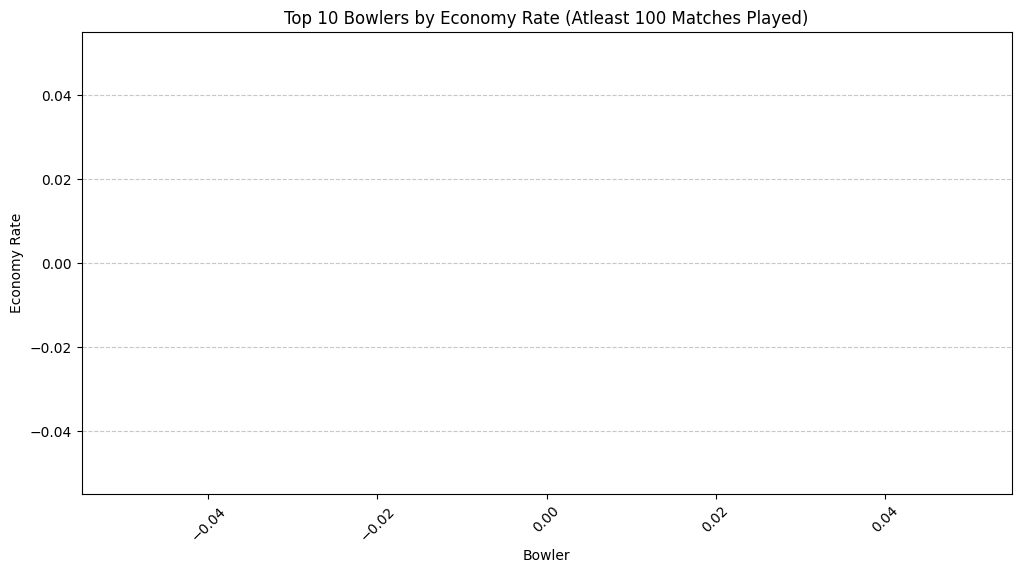

In [ ]:
#Top 10 bowler economy rate analysis

min_balls = 300  # Example threshold for balls bowled
min_matches = 100  # Minimum number of matches

# Calculate total balls bowled and number of matches for each bowler
balls_played = df.groupby("bowler")["ball"].sum().reset_index()
matches_played = df.groupby("bowler")["match_id"].nunique().reset_index()
matches_played.columns = ["bowler", "games_played"]

# Merge data on bowler
economy_df = pd.merge(balls_played, matches_played, on="bowler")

# Filter for bowlers with at least 'min_matches' games played and 'min_balls' balls bowled
economy_df = economy_df[(economy_df["games_played"] >= min_matches) & (economy_df["ball"] >= min_balls)]

# Calculate the economy rate (runs conceded per 6 balls)
economy_df = economy_df.merge(df.groupby("bowler")["total_runs"].sum().reset_index(), on="bowler")
economy_df["economy_rate"] = economy_df["total_runs"] / (economy_df["ball"] / 6)

# Sort by economy rate and take the top 10 bowlers
economy_df_sorted = economy_df.sort_values(by="economy_rate").head(10)

# Plot the economy rates of the top 10 bowlers
plt.figure(figsize=(12, 6))
plt.plot(
    economy_df_sorted["bowler"],
    economy_df_sorted["economy_rate"],
    marker="o",
    linestyle="-",
    color="green"
)
plt.title("Top 10 Bowlers by Economy Rate (Atleast 100 Matches Played)")
plt.xlabel("Bowler")
plt.ylabel("Economy Rate")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#Overall performance by top 10 performers

# Calculate the total runs for each batter
batting_performance = df.groupby("batter")["batsman_runs"].sum().reset_index()
batting_performance.columns = ["player", "batting_runs"]

# Calculate the total wickets for each bowler
bowling_performance = df[df["is_wicket"] == 1].groupby("bowler")["is_wicket"].count().reset_index()
bowling_performance.columns = ["player", "wickets"]

# Assuming fielding performance data exists in the dataset (e.g., total catches, run-outs)
# Example: Add a column for fielding performance (this would need actual data on fielding performance)
# If not available, set it to 0 for now.
fielding_performance = df.groupby("batter")["total_runs"].count().reset_index()  # Placeholder for fielding
fielding_performance.columns = ["player", "fielding"]

# Merge batting, bowling, and fielding performance
allrounder_performance = pd.merge(batting_performance, bowling_performance, on="player", how="outer")
allrounder_performance = pd.merge(allrounder_performance, fielding_performance, on="player", how="outer")

# Normalize the scores (simple approach: divide by max of each column)
allrounder_performance["batting_score"] = allrounder_performance["batting_runs"] / allrounder_performance["batting_runs"].max()
allrounder_performance["bowling_score"] = allrounder_performance["wickets"] / allrounder_performance["wickets"].max()
allrounder_performance["fielding_score"] = allrounder_performance["fielding"] / allrounder_performance["fielding"].max()

# Calculate final all-rounder score as the sum of normalized batting, bowling, and fielding scores
allrounder_performance["allrounder_score"] = (
    allrounder_performance["batting_score"] + allrounder_performance["bowling_score"] + allrounder_performance["fielding_score"]
)

# Sort by the all-rounder score and display the top performers
top_allrounders = allrounder_performance.sort_values(by="allrounder_score", ascending=False).head(10)
top_allrounders

,player,batting_runs,wickets,fielding,batting_score,bowling_score,fielding_score,allrounder_score
152,JH Kallis,2427.0,74.0,2291.0,0.803111,0.582677,1.000000,2.385788
324,SK Raina,3022.0,25.0,2214.0,1.000000,0.196850,0.966390,2.163241
278,RG Sharma,2714.0,16.0,2145.0,0.898081,0.125984,0.936272,1.960337
337,SR Watson,1966.0,64.0,1395.0,0.650563,0.503937,0.608904,1.763404
77,CH Gayle,2626.0,17.0,1713.0,0.868961,0.133858,0.747708,1.750528
374,V Kohli,2418.0,4.0,2011.0,0.800132,0.031496,0.877783,1.709411
138,IK Pathan,1113.0,96.0,945.0,0.368299,0.755906,0.412484,1.536688
393,YK Pathan,1897.0,41.0,1336.0,0.627730,0.322835,0.583151,1.533716
376,V Sehwag,2355.0,6.0,1563.0,0.779285,0.047244,0.682235,1.508764
300,S Dhawan,2010.0,4.0,1704.0,0.665122,0.031496,0.743780,1.440399


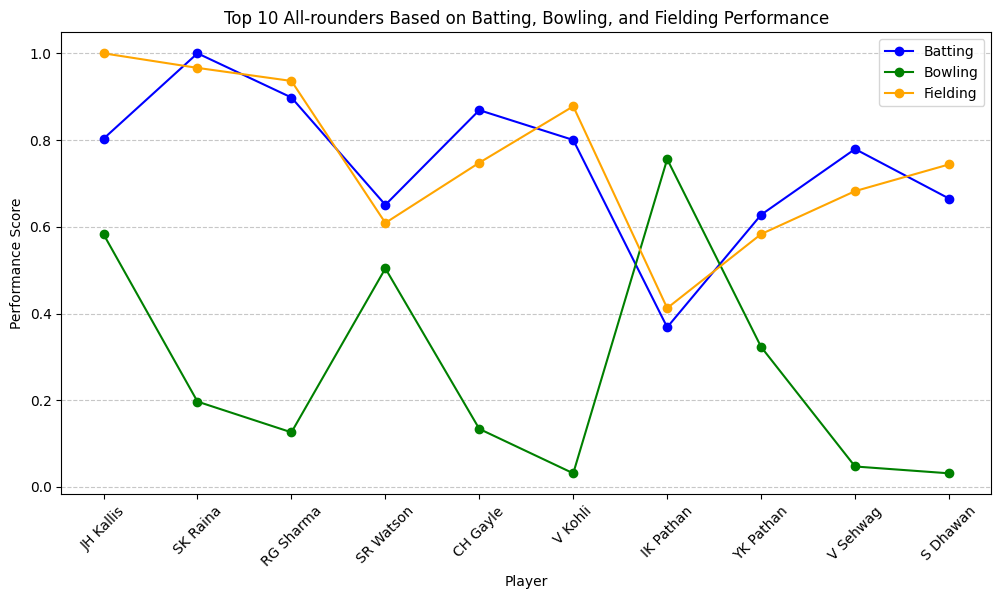

In [ ]:
plt.figure(figsize=(12, 6))

# Batting performance
plt.plot(top_allrounders["player"], top_allrounders["batting_score"], marker="o", linestyle="-", label="Batting", color="blue")

# Bowling performance
plt.plot(top_allrounders["player"], top_allrounders["bowling_score"], marker="o", linestyle="-", label="Bowling", color="green")

# Fielding performance
plt.plot(top_allrounders["player"], top_allrounders["fielding_score"], marker="o", linestyle="-", label="Fielding", color="orange")

# Title and labels
plt.title("Top 10 All-rounders Based on Batting, Bowling, and Fielding Performance")
plt.xlabel("Player")
plt.ylabel("Performance Score")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

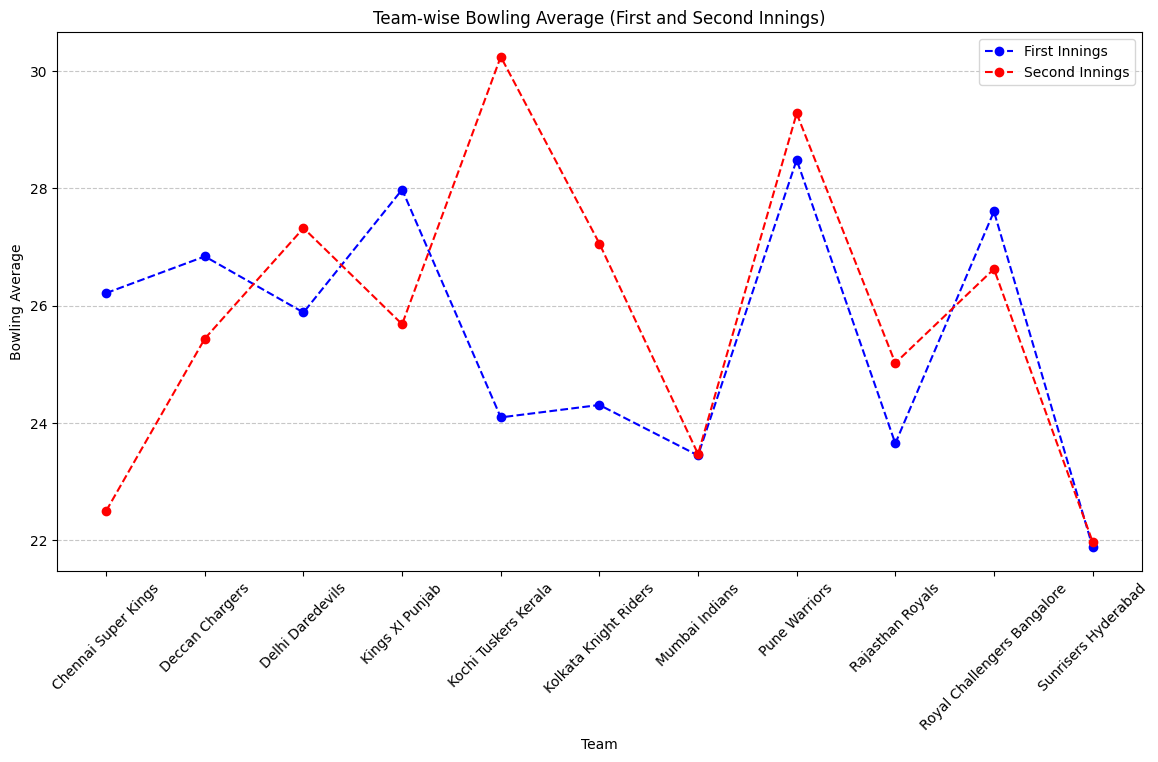

In [ ]:
#Teamwise bowling average
# Filter the data for wickets taken (assuming 'is_wicket' column is used to track wickets)
wickets_data = df[df["is_wicket"] == 1]

# Calculate total runs conceded and total wickets taken for each team by innings
bowling_stats = df.groupby(["bowling_team", "inning"]).agg(
    total_runs_conceded=("total_runs", "sum"),
    total_wickets_taken=("is_wicket", "sum")
).reset_index()

# Calculate bowling average for each team and innings
bowling_stats["bowling_average"] = bowling_stats["total_runs_conceded"] / bowling_stats["total_wickets_taken"]

# Plotting team-wise bowling averages for both innings
plt.figure(figsize=(14, 7))

# Plot for first innings
first_innings = bowling_stats[bowling_stats["inning"] == 1]
plt.plot(first_innings["bowling_team"], first_innings["bowling_average"], marker="o", linestyle="--", label="First Innings", color="blue")

# Plot for second innings
second_innings = bowling_stats[bowling_stats["inning"] == 2]
plt.plot(second_innings["bowling_team"], second_innings["bowling_average"], marker="o", linestyle="--", label="Second Innings", color="red")

# Title and labels
plt.title("Team-wise Bowling Average (First and Second Innings)")
plt.xlabel("Team")
plt.ylabel("Bowling Average")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

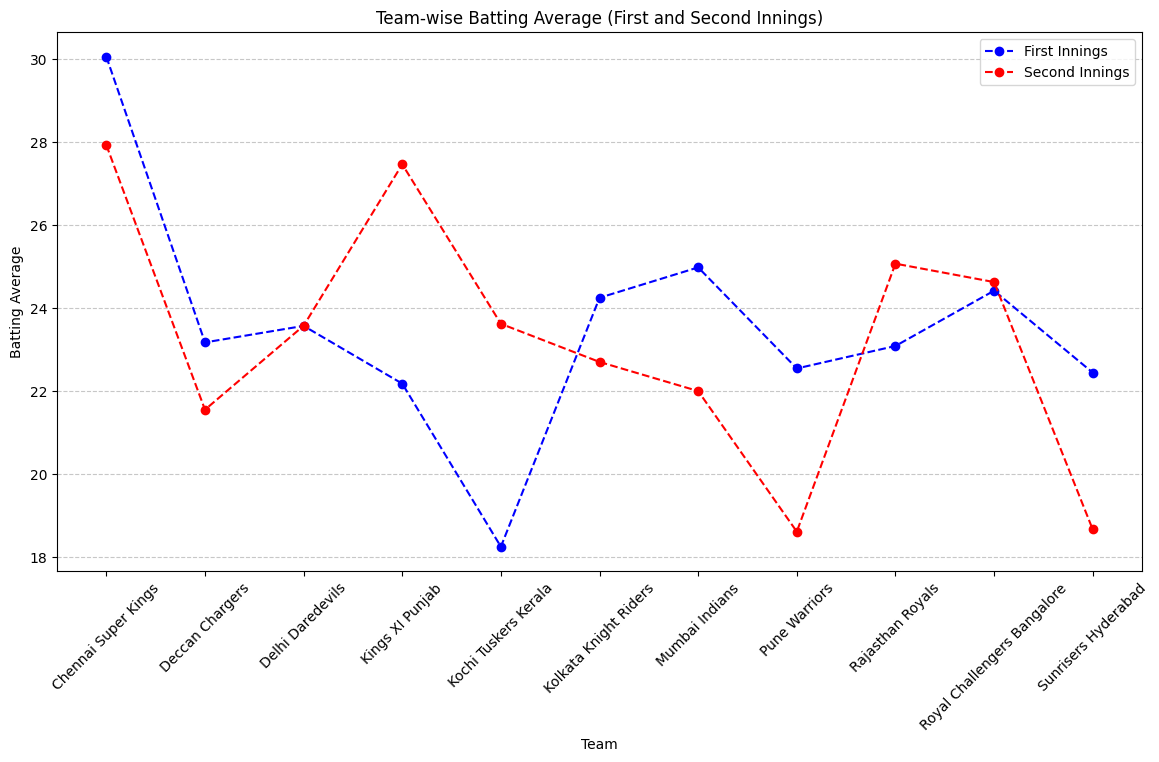

In [ ]:
#Teamwise batting average
# Calculate total runs scored and number of wickets lost for each team by innings
batting_stats = df.groupby(["batting_team", "inning"]).agg(
    total_runs_scored=("batsman_runs", "sum"),
    total_wickets_lost=("is_wicket", "sum")
).reset_index()

# Calculate batting average for each team and innings
batting_stats["batting_average"] = batting_stats["total_runs_scored"] / batting_stats["total_wickets_lost"]

# Plotting team-wise batting averages for both innings
plt.figure(figsize=(14, 7))

# Plot for first innings
first_innings_batting = batting_stats[batting_stats["inning"] == 1]
plt.plot(first_innings_batting["batting_team"], first_innings_batting["batting_average"], marker="o", linestyle="--", label="First Innings", color="blue")

# Plot for second innings
second_innings_batting = batting_stats[batting_stats["inning"] == 2]
plt.plot(second_innings_batting["batting_team"], second_innings_batting["batting_average"], marker="o", linestyle="--", label="Second Innings", color="red")

# Title and labels
plt.title("Team-wise Batting Average (First and Second Innings)")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()
